2192. All Ancestors of a Node in a Directed Acyclic Graph
Solved
Medium
Topics
Companies
Hint
You are given a positive integer n representing the number of nodes of a Directed Acyclic Graph (DAG). The nodes are numbered from 0 to n - 1 (inclusive).

You are also given a 2D integer array edges, where edges[i] = [fromi, toi] denotes that there is a unidirectional edge from fromi to toi in the graph.

Return a list answer, where answer[i] is the list of ancestors of the ith node, sorted in ascending order.

A node u is an ancestor of another node v if u can reach v via a set of edges.

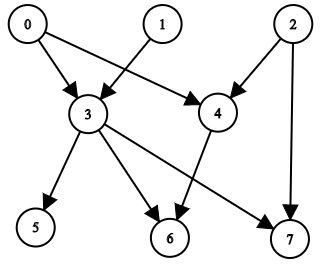

Input: n = 8, edgeList = [[0,3],[0,4],[1,3],[2,4],[2,7],[3,5],[3,6],[3,7],[4,6]]
Output: [[],[],[],[0,1],[0,2],[0,1,3],[0,1,2,3,4],[0,1,2,3]]
Explanation:
The above diagram represents the input graph.
- Nodes 0, 1, and 2 do not have any ancestors.
- Node 3 has two ancestors 0 and 1.
- Node 4 has two ancestors 0 and 2.
- Node 5 has three ancestors 0, 1, and 3.
- Node 6 has five ancestors 0, 1, 2, 3, and 4.
- Node 7 has four ancestors 0, 1, 2, and 3.

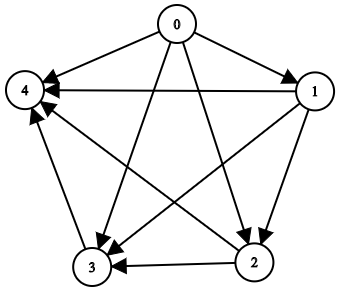

Input: n = 5, edgeList = [[0,1],[0,2],[0,3],[0,4],[1,2],[1,3],[1,4],[2,3],[2,4],[3,4]]
Output: [[],[0],[0,1],[0,1,2],[0,1,2,3]]
Explanation:
The above diagram represents the input graph.
- Node 0 does not have any ancestor.
- Node 1 has one ancestor 0.
- Node 2 has two ancestors 0 and 1.
- Node 3 has three ancestors 0, 1, and 2.
- Node 4 has four ancestors 0, 1, 2, and 3.
 

Constraints:

1 <= n <= 1000
0 <= edges.length <= min(2000, n * (n - 1) / 2)
edges[i].length == 2
0 <= fromi, toi <= n - 1
fromi != toi
There are no duplicate edges.
The graph is directed and acyclic.


In [1]:
from typing import List
import collections
from collections import deque
class Solution:
    def getAncestors(self, n: int, edges: List[List[int]]) -> List[List[int]]:
        result = [set() for _ in range(n)]
        indegrees = [0] * n
        adj_list = collections.defaultdict(list)
        for u, v in edges:
            adj_list[u].append(v)
            indegrees[v] += 1
        queue = deque()
        for i in range(len(indegrees)):
            if not indegrees[i]:
                queue.append(i)
        while queue:
            node = queue.popleft()
            for neighbor in adj_list[node]:
                result[neighbor].update(result[node], [node]) # Update method will add the elements of other set into the existing set. So whenever the neighboring element will append the parent node. It will also the add elemenet sof parent node i.e. ancestor node
                indegrees[neighbor] -= 1
                if not indegrees[neighbor]:
                    queue.append(neighbor)
            result[node] = sorted(result[node])
        return result
